# <span style="color:darkblue"> Lecture 10: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [33]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda activate qtm151```

```conda install statsmodels```

In [34]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [35]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [36]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

In [37]:
print(dataset["x"])

0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
5    -0.234137
6     1.579213
7     0.767435
8    -0.469474
9     0.542560
10   -0.463418
11   -0.465730
12    0.241962
13   -1.913280
14   -1.724918
15   -0.562288
16   -1.012831
17    0.314247
18   -0.908024
19   -1.412304
20    1.465649
21   -0.225776
22    0.067528
23   -1.424748
24   -0.544383
25    0.110923
26   -1.150994
27    0.375698
28   -0.600639
29   -0.291694
30   -0.601707
31    1.852278
32   -0.013497
33   -1.057711
34    0.822545
35   -1.220844
36    0.208864
37   -1.959670
38   -1.328186
39    0.196861
40    0.738467
41    0.171368
42   -0.115648
43   -0.301104
44   -1.478522
45   -0.719844
46   -0.460639
47    1.057122
48    0.343618
49   -1.763040
Name: x, dtype: float64


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [42]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] +dataset["e"]

In [39]:
dataset["y"]

0     1.993428
1     0.723471
2     2.295377
3     4.046060
4     0.531693
5     0.531726
6     4.158426
7     2.534869
8     0.061051
9     2.085120
10    0.073165
11    0.068540
12    1.483925
13   -2.826560
14   -2.449836
15   -0.124575
16   -1.025662
17    1.628495
18   -0.816048
19   -1.824607
20    3.931298
21    0.548447
22    1.135056
23   -1.849496
24   -0.088765
25    1.221845
26   -1.301987
27    1.751396
28   -0.201277
29    0.416613
30   -0.203413
31    4.704556
32    0.973006
33   -1.115422
34    2.645090
35   -1.441687
36    1.417727
37   -2.919340
38   -1.656372
39    1.393722
40    2.476933
41    1.342737
42    0.768703
43    0.397793
44   -1.957044
45   -0.439688
46    0.078722
47    3.114244
48    1.687237
49   -2.526080
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [40]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

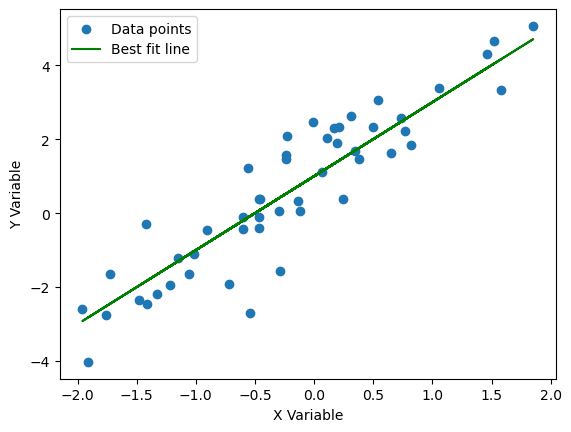

In [43]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')
plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
#what each variable in the plot() represent 
#the e-values represent the error value/noise reflective 
#of real world data (add/subtract value on the green line)
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [44]:
# Write your own code here
subset_above2 = dataset.query("y>=2")
print(len(dataset))
print(len(subset_above2))
print(len(dataset)/len(subset_above2))


50
15
3.3333333333333335


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [55]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean
stdv_sample = dataset["y"].std
dataset.query("abs(y-@ybar)<= @stdv_sample")


TypeError: unsupported operand type(s) for -: 'float64' and '<class 'method'>'

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [62]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"

#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"

#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     389.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.14e-24
Time:                        16:39:29   Log-Likelihood:                -63.422
No. Observations:                  50   AIC:                             130.8
Df Residuals:                      48   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0410      0.122      8.533      0.000       0.802       1.280
x              2.1031      0.107     19.727      0.000       1.894       2.312
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.563
Skew:                          -0.464   Prob(JB):                        0.278
Kurtosis:                       3.608   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [58]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


In [63]:
#b0 & b1 is respectively the intercept & slope
#previously we constructed data out of the the two parameters
#The OLS model uses the data to estimate the intercept & slope

<font size = "5">

Plot the best fit line

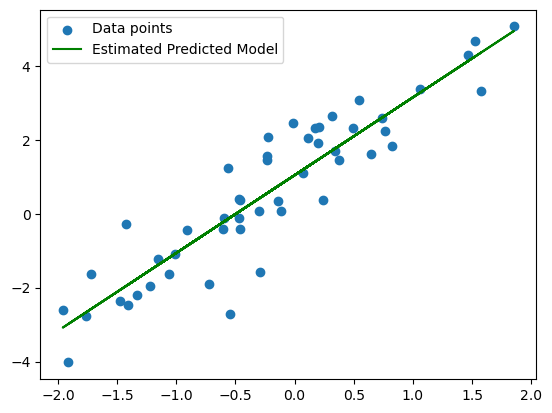

In [34]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

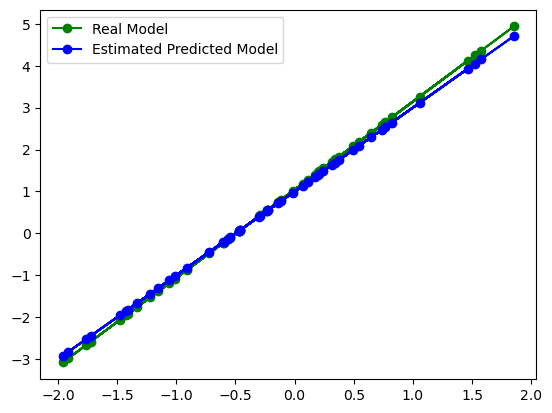

In [71]:
# Write your own code
#(p vs x) and (pest vs x)
plt.plot(dataset["x"],dataset["p_estimated"], "-o", color = 'green') #-o plots the data points
plt.plot(dataset["x"],dataset["p"], "-o", color = "blue")

plt.legend(labels = ["Real Model","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [36]:
# Write your own code


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [37]:
# Write your own code
